In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import rater
import pickle

In [2]:
results_df = pd.read_csv('data/snooker_outcomes_dedup.csv',parse_dates=['date'])

In [3]:
results_df['outcome'] = results_df.Result.map({'Lost':0,
                                              'Won':1,
                                              'Drew':0.5})

In [4]:
results_df = results_df.rename(columns={
                                       'Name':'player_1',
                                       'Opponent':'player_2'})

In [5]:
s_elo = rater.ELO(fixtures=results_df,target='outcome')

In [6]:
s_fixtures, s_ratings = s_elo.process_all_fixtures()

In [7]:
s_fixtures.tail()

,Date,Tournament,Category,Round,Result,player_2,Score,player_1,player_key,date,round_count,first_score,second_score,outcome,rating_1,rating_2,rating_diff,e_outcome
56594,27/04/2019,World Championships,WC,Last 16,Lost,Gary Wilson,10 V 13,Mark Selby,6,2019-04-27,6,10.0,13.0,0.0,1605.872264,1472.648301,133.223964,0.682850
56595,27/04/2019,World Championships,WC,Last 16,Won,James Cahill,13 V 12,Stephen Maguire,7,2019-04-27,6,13.0,12.0,1.0,1537.547489,1371.132282,166.415207,0.722714
56596,27/04/2019,World Championships,WC,Last 16,Lost,Dave Gilbert,9 V 13,Mark Williams,22,2019-04-27,6,9.0,13.0,0.0,1581.149710,1517.231316,63.918394,0.590962
56597,29/04/2019,World Championships,WC,Last 16,Drew,Stuart Bingham,4 V 4,John Higgins,5,2019-04-29,4,4.0,4.0,0.5,1593.797473,1624.379433,-30.581960,0.456102
56598,29/04/2019,World Championships,WC,Last 16,Lost,Judd Trump,3 V 5,Ding Junhui,26,2019-04-29,4,3.0,5.0,0.0,1583.603118,1684.344422,-100.741305,0.358952


In [8]:
s_ratings[ 'Ronnie O Sullivan']

1757.9839508754853

In [9]:
s_ratings[ 'Mark Selby']

1595.6295194697307

In [10]:
ratings_plot = s_fixtures.loc[:,['date','player_1','player_2','rating_1','rating_2']]

In [11]:
ratings_plot['id'] = ratings_plot.index

In [12]:
plot_df = (pd.wide_to_long(ratings_plot, ["player_","rating_"], i="id", j="num").rename(
columns={'player_':'player',
        'rating_':'rating'}))

In [13]:
plot_df['max_rating'] = plot_df.groupby('player')['rating'].transform('max')

In [41]:
top_df = plot_df.loc[(plot_df.max_rating > 1640) & (plot_df.date > '1970') & (plot_df.rating > 1500),:]

In [42]:
len(top_df.player.unique())

12

In [43]:
top_df = top_df.sort_values(by='date')

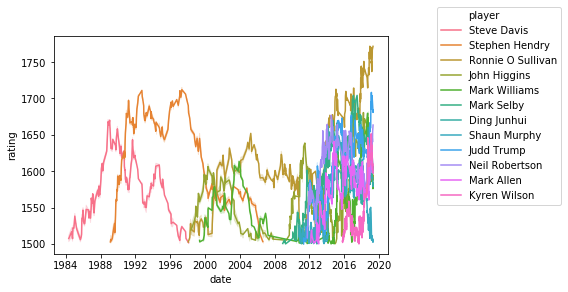

In [44]:
ax= sns.lineplot(data=top_df,x='date',y='rating',hue='player')
plt.legend(bbox_to_anchor=(1.0,1.0),\
    bbox_transform=plt.gcf().transFigure)
plt.save

In [78]:
recent_df = plot_df.loc[(plot_df.max_rating > 1670) & (plot_df.date >= '2010') & (plot_df.rating > 1550),:]

Text(0.5, 1.0, 'Snooker ELOs - 2010 to present \n')

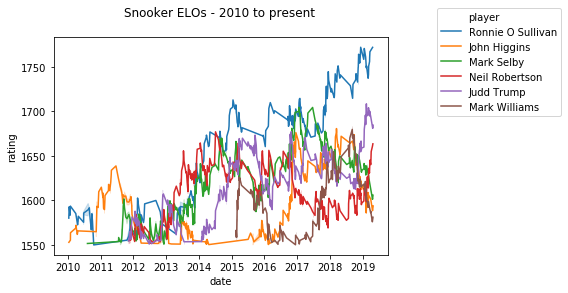

In [79]:
ax= sns.lineplot(data=recent_df,x='date',y='rating',hue='player')
plt.legend(bbox_to_anchor=(1.0,1.0),\
    bbox_transform=plt.gcf().transFigure)
plt.title('Snooker ELOs - 2010 to present \n')

In [76]:
older_df = plot_df.loc[ (plot_df.date > '1970') 
                       & (plot_df.rating > 1500)
                       & (plot_df.max_rating > 1550)
                       & (plot_df.date < '2010')
                       & (plot_df.player != 'Mark Selby'),:]

Text(0.5, 1.0, 'Snooker ELOs - 1980 to 2010 \n')

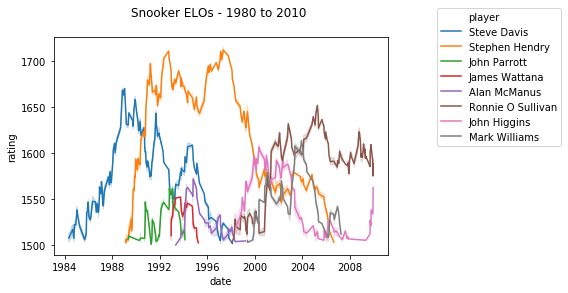

In [77]:
ax= sns.lineplot(data=older_df,x='date',y='rating',hue='player')
plt.legend(bbox_to_anchor=(1.0,1.0),\
    bbox_transform=plt.gcf().transFigure)
plt.title('Snooker ELOs - 1980 to 2010 \n')

In [56]:
with open('data/snooker_ratings.pickle', 'wb') as f:
    pickle.dump( dict(s_ratings),f)